In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Project Dataset\spam.csv", encoding="latin1")
df.shape

(5572, 5)

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [5]:
df = df.rename(columns={'v1' : 'target', 'v2':'description'})

In [6]:
df.head()

,target,description
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [9]:
print(df.duplicated().sum())

403


In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

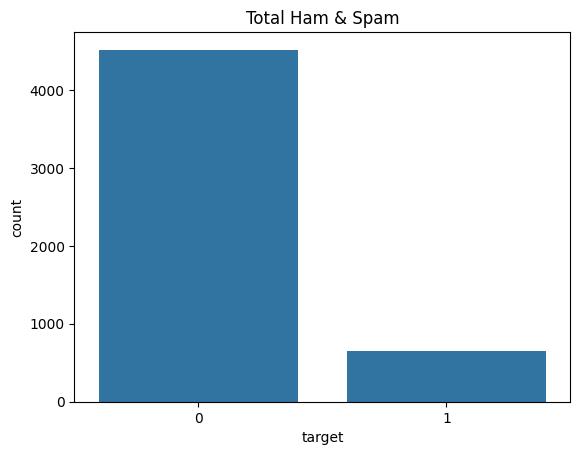

In [12]:
sns.countplot(data=df, x='target')
plt.title('Total Ham & Spam')
plt.show()

In [13]:
df['total_char'] = df['description'].apply(len)

In [14]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
df['total_word'] = df['description'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\iamaf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iamaf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
df.head(5)

,target,description,total_char,total_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [16]:
df['total_sent'] = df['description'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [17]:
df.head()

,target,description,total_char,total_word,total_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
df.describe()

,target,total_char,total_word,total_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


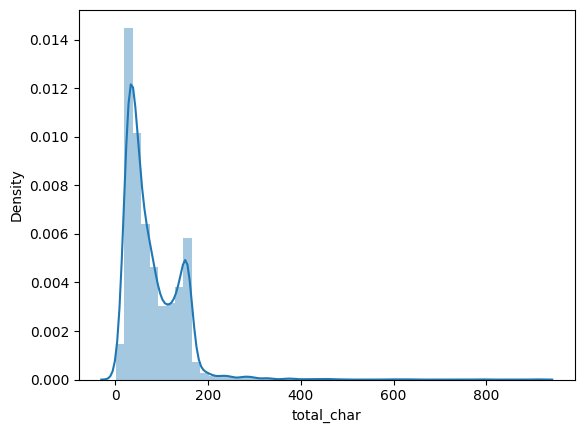

In [19]:
sns.distplot(df['total_char'])
plt.show()

In [20]:
q1 = df['total_char'].quantile(0.25)
q3 = df['total_char'].quantile(0.75)
iqr = q3-q1
min_range = q1 - iqr*1.5
max_range = q3 + iqr*1.5
df = df[df['total_char']<max_range]

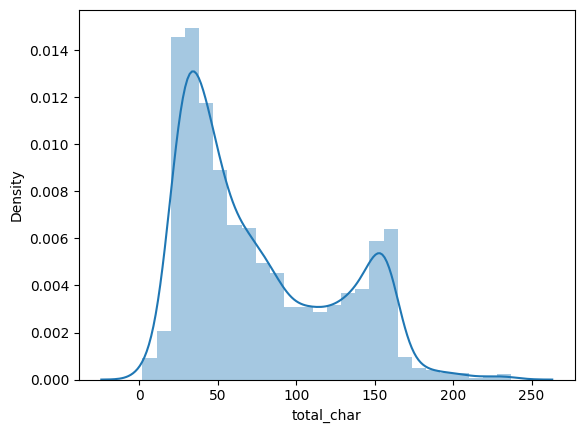

In [21]:
sns.distplot(df['total_char'])
plt.show()

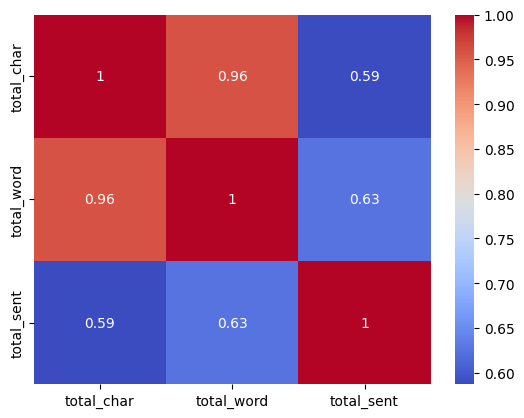

In [22]:
ds = df[['total_char', 'total_word', 'total_sent']]
sns.heatmap(ds.corr(), annot=True, cmap = 'coolwarm')
plt.show()

In [23]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iamaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [25]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [26]:
df['transformed_des'] = df['description'].apply(transform_text)

In [27]:
df.head(2)

,target,description,total_char,total_word,total_sent,transformed_des
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


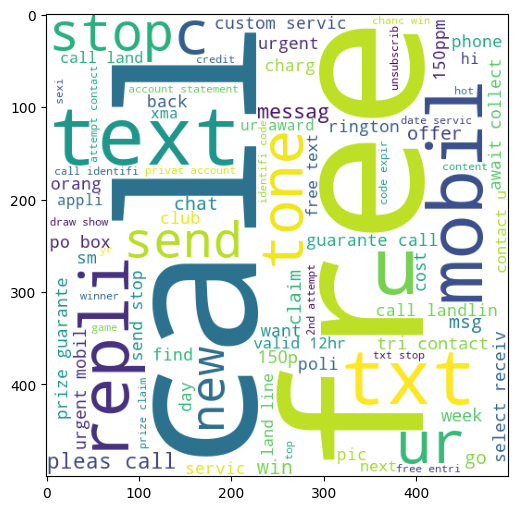

In [28]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_des'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

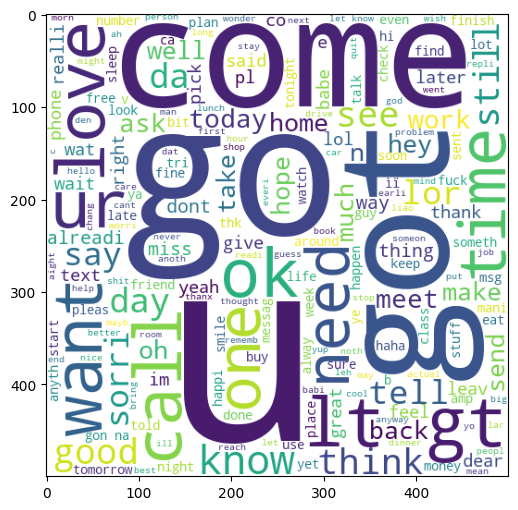

In [29]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_des'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

# Model Building

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x = cv.fit_transform(df['transformed_des']).toarray()

In [31]:
y = df['target']

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [33]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [34]:
bb = BernoulliNB()
bb.fit(x_train, y_train)

BernoulliNB()

In [35]:
print(bb.score(x_test, y_test)*100)

98.0411361410382


In [36]:
print(bb.score(x_train, y_train)*100)

97.8686918177364


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

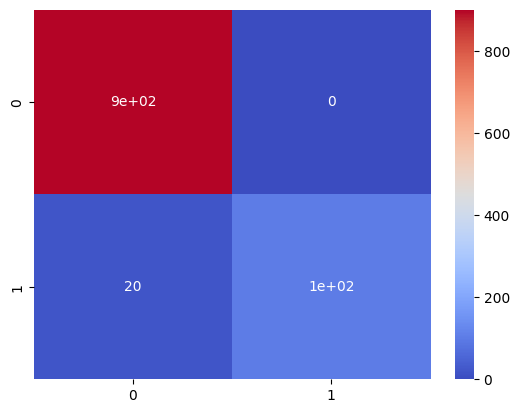

In [38]:
cm = confusion_matrix(y_test, bb.predict(x_test))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

In [39]:
print(f"accuracy score: {accuracy_score(y_test, bb.predict(x_test))*100:.2f}")
print(f"precision score: {precision_score(y_test, bb.predict(x_test))*100:.2f}")
print(f"recall score: {recall_score(y_test, bb.predict(x_test))*100:.2f}")
print(f"f1 score: {f1_score(y_test, bb.predict(x_test))*100:.2f}")

accuracy score: 98.04
precision score: 100.00
recall score: 83.33
f1 score: 90.91


In [40]:
# Hyperparameter Tuning

parameters = [{
    'alpha' : [i for i in range(2,20)],
    'binarize' : [i for i in range(2,20)]
}]

In [41]:
# from sklearn.model_selection import GridSearchCV

# gd = GridSearchCV(BernoulliNB(), param_grid=parameters)
# gd.fit(x_train, y_train)

In [42]:
import joblib
joblib.dump(cv, 'vectorizer.joblib')
joblib.dump(bb, 'model.joblib')

['model.joblib']

In [43]:
import sklearn
import nltk
import wordcloud
print(f"scikit-learn version: {sklearn.__version__}")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"nltk: {nltk.__version__}")
print(f"word: {wordcloud.__version__}")

scikit-learn version: 1.6.0
numpy: 2.1.2
pandas: 2.2.3
nltk: 3.9.1
word: 1.9.4


In [44]:
sc = joblib.load('vectorizer.joblib')
jb = joblib.load('model.joblib')